In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer

In [10]:
df = pd.read_csv("Diwali Sales Data.csv" , encoding = "latin1")

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [12]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [149]:
df.drop(["Status" , "unnamed1"] , axis= 1 ,inplace = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [36]:
df.shape

(11239, 13)

In [32]:
df.dropna(inplace = True)

In [44]:
df["Amount"].astype("int")

0        23952
1        23934
2        23924
3        23912
4        23877
         ...  
11246      370
11247      367
11248      213
11249      206
11250      188
Name: Amount, Length: 11239, dtype: int32

In [48]:
df["Amount"].astype("int").dtypes

dtype('int32')

In [50]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [52]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610858
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [54]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

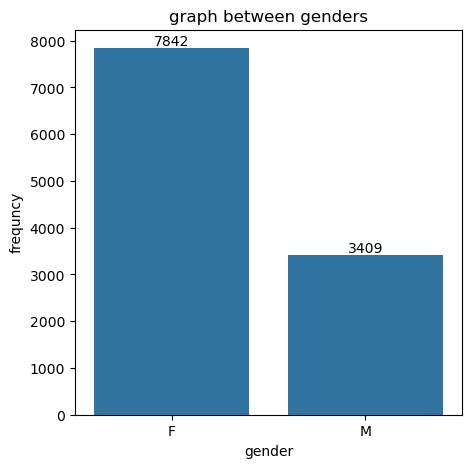

In [83]:
plt.figure(figsize = (5, 5))
ax = sns.countplot(x = "Gender"  , data = df)
plt.title("graph between genders")
plt.ylabel("frequncy")
plt.xlabel("gender")
for bars in ax.containers:
    ax.bar_label(bars)

most of the buyers are female

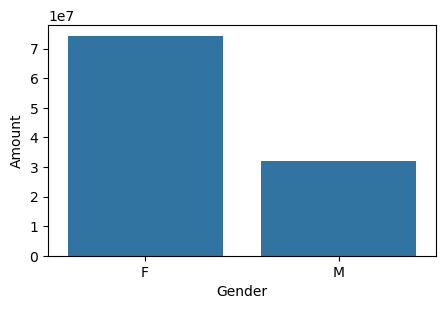

In [87]:
sales_gen = df.groupby(["Gender"],as_index =False) ["Amount"].sum().sort_values(by = "Amount" , ascending = False)
plt.figure(figsize = (5 , 3))
sns.barplot(x = "Gender" ,y = "Amount" , data = sales_gen)

#plt.figure(figsize = (3 , 1))
for bars in ax.containers:
    ax.bar_label(bars)

from above grapgh we can see that female spent amount is much more than male


In [128]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

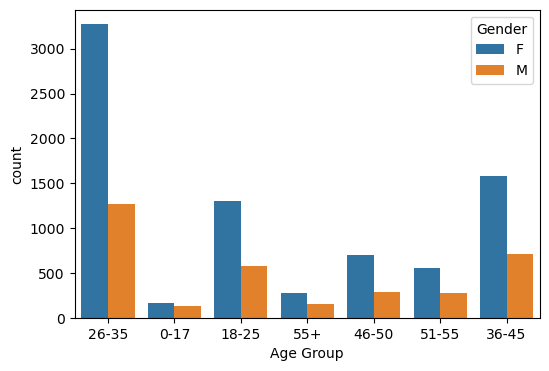

In [89]:
import seaborn as sns
plt.figure(figsize = (6 ,4))
sns.countplot(x = "Age Group" ,hue = "Gender" ,data = df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

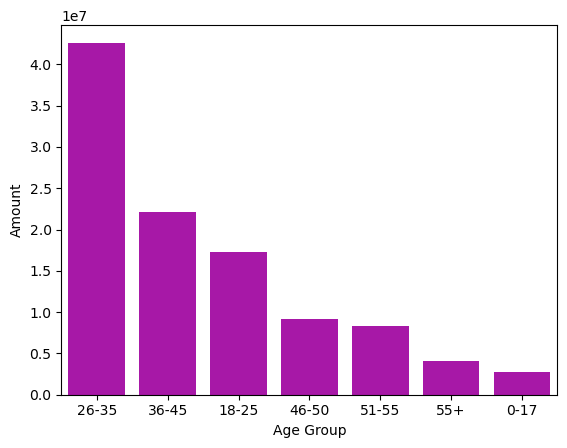

In [67]:
sales_gen1 = df.groupby(["Age Group"] , as_index =False) ["Amount"].sum().sort_values(by = "Amount" , ascending = False)
sns.barplot(x ="Age Group" , y = "Amount" , data = sales_gen1 , color = "m")

In [69]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

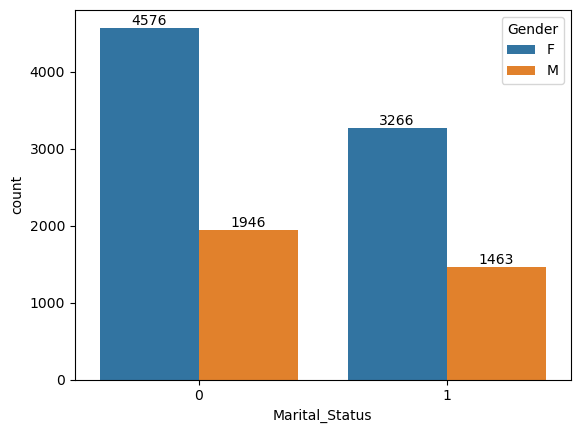

In [93]:
ax1 = sns.countplot(x = "Marital_Status" ,hue = "Gender", data = df)
for bars in ax1.containers:
    ax1.bar_label(bars)

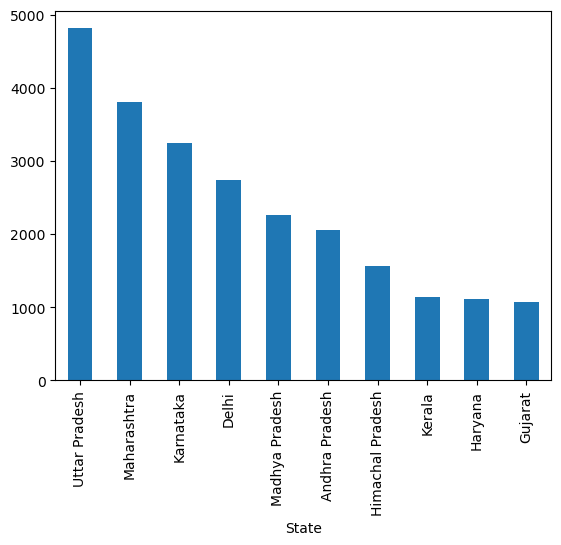

In [141]:
grp_by = df.groupby("State")["Orders"].sum().sort_values( ascending = False).head(10).plot(kind = "bar")
#plt.figure(figsize = (15 , 6))
#sns.barplot(data = grp_by , x = "State" , y = "Orders" , hue = "Gender")

In [151]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Amount'>

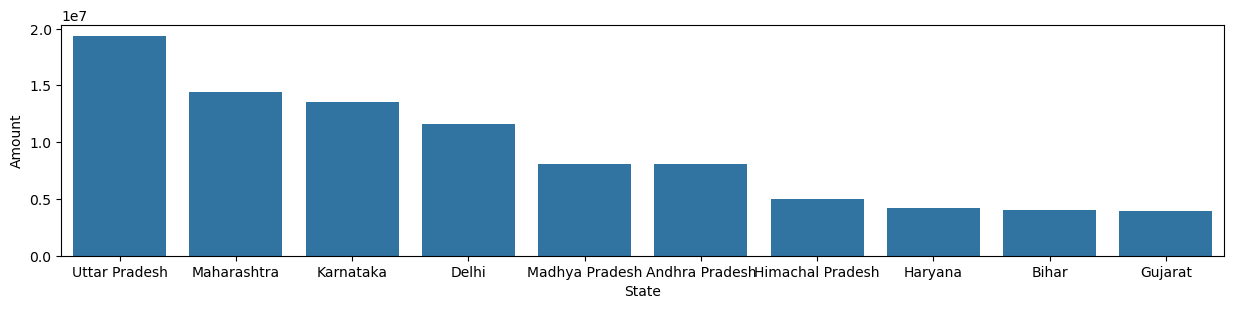

In [163]:
grp_by = df.groupby(["State" ] , as_index = False) ["Amount"].sum().sort_values(by = "Amount" ,  ascending = False).head(10)
plt.figure(figsize = (15 , 3))
sns.barplot(data = grp_by , x = "State" , y = "Amount" )

<Axes: xlabel='Occupation', ylabel='Amount'>

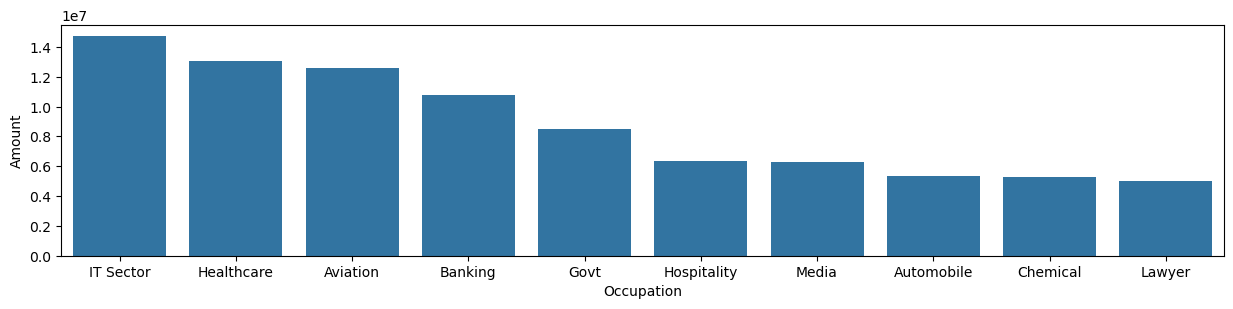

In [16]:
grp_by = df.groupby(["Occupation"  ] , as_index = False) ["Amount"].sum().sort_values(by = "Amount" ,  ascending = False).head(10)
plt.figure(figsize = (15 , 3))
sns.barplot(x = "Occupation" , y = "Amount"  , data = grp_by)

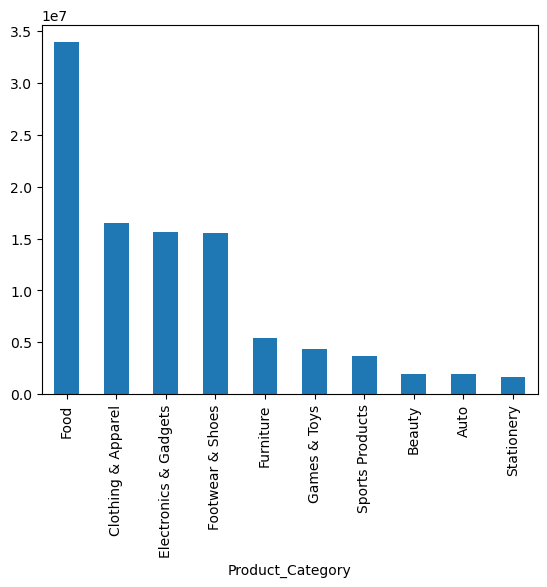

In [40]:
sales_by_product = df.groupby("Product_Category" ) ["Amount"].sum().sort_values( ascending = False).head(10).plot(kind = "bar")
#plt.figure(figsize = (18 , 5))
#sns.barplot(x = "Product_Category" , y = "Amount" , data = sales_by_product)

CONCLUSION : Married women from age 26 -35 are more likely to buy product like food ,clothing and electronics from up , maharastra and karnatka
